In [ ]:
%reload_ext postcell
%postcell register

In [ ]:
import random
import altair as alt
import pandas as pd
import numpy as np

# Data structures

The study of data structures is the study of containers of data, such as lists, dictionaries, trees, graphs, etc. As data scientists we don't need to be experts in creating new data structures, however, we need to be aware of how they are built (if only to pass interviews).

### Arrays: values next to each other in memory
Scalar variables, such as `int`, `float` or `str` are too simple to handle collections of data. Among the more complex data structures, an _array_ is, structurally, the simplest. An array is a _contiguous_ list of elements. These are values which are packed next to each other in memory.

In [ ]:
# This code is just to visualize memory
locs = {35:'H', 36:'E', 37:'L', 38:'L', 39:'O'}

W = 30
H = 10
print('  '+' '.join([f"{i:02d}" for i in range(1,W+1)]))
for i in range(H):
    mem = list()
    for j in range(W):
        idx = W*i + j
        mem.append('['+locs.get(idx, ' ')+']')
    print(str(i)+''.join(mem))

Once you find the initial location of the data, retrieving the rest of the data is as easy as going to the next memory location. This is EXTREMELY CHEAP!

See latency coparisons for more context: https://gist.github.com/hellerbarde/2843375

**Tradeoff** What if you wanted to insert an element in the middle of the array? You can't! You have to copy all the values to a new location, with the new value inserted! What if you had to remove a value? (also expensive). What if you needed to get or update a value, could be _very_ cheap!

### Linked lists: more flexible, but you have to jump all over memory

What if it was very important to add, and remove items from the middle of the list? This makes no sense for pictuers, audio files or other matrices. However, if you were tracking the names of gym members currently in your gym (tracked by an electronic key fob), then it IS important to add new clients and remove them as they exit.

One very popular data strucure with such capability is a _linked list_. As the name implies, this is a list of values, that are _linked_ together. A visual image will make this easier.

[item, next_location], [item, next_location], [item, next_location], [item, next_location], ...

In [ ]:
# This code is just to visualize memory
locs = {35:'H', 36:'>', 148:'E', 149:'>', 17:'L', 18:'>', 250:'L', 251:'>', 100:'O', 101:'>'}

W = 30
H = 10
print('  '+' '.join([f"{i:02d}" for i in range(1,W+1)]))
for i in range(H):
    mem = list()
    for j in range(W):
        idx = W*i + j
        mem.append('['+locs.get(idx, ' ')+']')
    print(str(i)+''.join(mem))

Notice how you have to jump all over your memory. This dramatically slows things down. However, it makes it trivial to add a new element, change the arraow coming in and create an approrpiate arrow going out (see white board drawn example for details)

### Performance of data structures can be measured abstractly: use the "Big O" notation

If you want to access the "3rd" element of an array, given the start location of the array, you can jump straight to the 3rd location (START + 3). However, accessing the third element of a linked list requires you to start at location zero, get the address for location 2, jump there, get the location 3, then jump there.

What if you were asked for the location of the thousandth's element of an array? It would still take you the same time: START + 1000. It doesn't matter how many elements are in an array! However, as linked lists grow, the time it takes to access elements also grows.

This means that no matter how many elements there are in an array, we can access them in a single jump. In technical terms, the "order fo approximation of 1" or O(1) (aka Big O of 1). Since the time it takes to access linked list elements depends on the number of items, the Big O for linked lists is O(n) (where 'n' stands for the number of elements).

See this chart for a more detailed table: https://www.bigocheatsheet.com/

### Linked list implementation: we ened class properties which point to themselves

In [ ]:
class Node():
    def __init__(self, value, next_node):
        self.value = value
        self.next_node = next_node
        
    def __repr__(self): # (calling the str() function automatically calls the __repr__ function)
        if self.next_node is None:
            return str(self.value) # <= Notice we are not doing anything with next_node, since it is known to be empty
        else:
            return str(self.value) + str(self.next_node)
    
    def __len__(self):
        #I don't know the length of this list ... so get length of the next node
        # (but we won't know the lengths of ANY nodes...right?)
        # Get the length of the node where next_node is None (the last node), then just add 1 to all "subsequent" nodes
        if self.next_node is None:
            return 1
        else:
            return 1 + len(self.next_node)

In [ ]:
n = Node('H', Node('E', Node('L', Node('L', Node('O', None)))))

In [ ]:
n

In [ ]:
type(n)

In [ ]:
len(n)

### Trees: parents with multiple children

Say you have a company's organization chart. There is the CEO at the top. Chief data officer, chief marketing officer and other CXOs report to her. Each of these cheifs has their own direct reports, who in turn have people reporting to them. How do you represent that? 
```
-CEO
    - CMO
        - Digital Marketing
        - Print Marketing
    - COO
        - Operations
        - Logistics
    - CDO
        - Data Science
        - Data Engineering
```

Similarly, how should one represent mathematical expressions, such as: (12 + 3x) / (45x * 13y)^2

```
- /
    - +
        - 12
        - *
            - 3
            - x
    - ^
        - *
            - *
                - 45
                - x
            - *
                - 13
                - y
        - 2
```

Certainly there are many ways to represent such structures (nested lists, nested dictionaries, stacks, etc.), but _trees_ are a natural data structure. 

![](images/binary_tree.svg)


Trees are heirarchical data structures that have one parent and any number of children. 


Let's build one.

In [ ]:
class BinaryTree():
    def __init__(self, value, left_child, right_child):
        self.value = value
        self.left_child = left_child
        self.right_child = right_child
        
    def __repr__(self): # (calling the str() function automatically calls the __repr__ function)
        
        left_repr = str(self.left_child) if self.left_child is not None else ''
        right_repr = str(self.right_child) if self.right_child is not None else ''

        output = list()
        output.append('(')
        output.append(self.value) 
        output.append(left_repr)
        output.append(right_repr)
        output.append(')')

        return ' '.join(output)
            
    
    def __len__(self):
        left, right = 0, 0
        
        if self.left_child is not None:
            left = len(self.left_child)
        if self.right_child is not None:
            right = len(self.right_child)
        return 1 + left + right


In [ ]:
# (12 + x) / 1
math_expr = BinaryTree('/', 
                  BinaryTree('+', 
                             BinaryTree('12', None, None), 
                             BinaryTree('x', None, None)), 
                  BinaryTree('1', None, None)
                 )

In [ ]:
len(math_expr)

In [ ]:
math_expr

**Exercise** Change the \_\_repr__ function by putting self.value _between_ left_repr and right_repr. Execute the expression above check the output (you can just enter `math_expr` in a cell and evaluate it)

In [ ]:
%%postcell exercise_025_270_a

#Type code here
math_expr

**Example** Implement a function to evaluate math expressions

In [ ]:
#Notice that we are skipping loads of error checking here

def eval_expr(bintree, x):
    operator = bintree.value
    if operator.isnumeric():
        return int(operator)
    elif operator == '+':
        left_operand = eval_expr(bintree.left_child, x)
        right_operand = eval_expr(bintree.right_child, x)
        return left_operand + right_operand
    elif operator == '-':
        left_operand = eval_expr(bintree.left_child, x)
        right_operand = eval_expr(bintree.right_child, x)
        return left_operand - right_operand
    elif operator == '*':
        left_operand = eval_expr(bintree.left_child, x)
        right_operand = eval_expr(bintree.right_child, x)
        return left_operand * right_operand
    elif operator == '/':
        left_operand = eval_expr(bintree.left_child, x)
        right_operand = eval_expr(bintree.right_child, x)
        return left_operand / right_operand
    elif operator == 'x':
        return x
    else:
        return f"ERROR: Operator '{operator}' not found" # Should raise an exception

In [ ]:
eval_expr(math_expr, 5)

**Exercise** Add the power operator `^` to the function above (paste the full function below). Evaluate the following expression
(note: in Python the power operator is actually `**`, but we are using `^` becuase it is a single character)

In [ ]:
# (12 + x^2) / 2
math_expr2 = BinaryTree('/', 
                  BinaryTree('+', 
                             BinaryTree('12', None, None), 
                             BinaryTree('^', BinaryTree('x', None, None), BinaryTree('2', None, None))), 
                  BinaryTree('2', None, None)
                 )
math_expr2

In [ ]:
%%postcell exercise_025_270_b

#Type code here

### Graphs are a generalization of trees

See http://www.visualcomplexity.com/vc/ for examples of beautiful trees and graphs

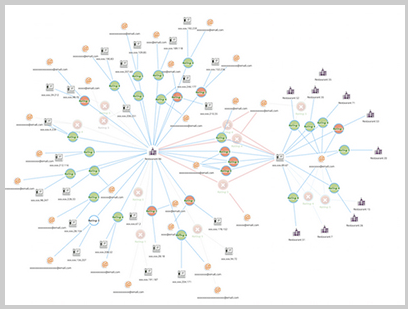

source: http://www.visualcomplexity.com/vc/project_details.cfm?id=965&index=965&domain=

Graphcs also consist of nodes and edges, any node can be connected to any other node. Some terms you might hear in computer science as well as data science and machine learning:

**Directed graph** This refers to graphs where edges have a direction. For example, in a map of cities (nodes) and roads connecting those cities (edges), if Chicago is connected to Madison, then Madison is necessarily connected to Chicago. The connection is bi-directional (highways are not one-way). On the other hand, in a family tree, Home and Lisa (nodes) are connected to each other. However, the relationshp (edge) of "father" is only one way, between Homer and Lisa, similarly the relationship of "daughter" is not bi-directional between them. 

_Directed graphs_ have a one-way direction. Nodes are allowed to be connected to each other, but each direction would be a different edge.

**Acyclic graph** This is a slightly less concrete concept, it refers to graphs which have no cycles. A social network can have cycles: Bob is connected to Sally, who is connected to Tom, who is connected back to Bob again. However, an org chart at a company (a tree!) can not contain cycles. One's subbordinate can't also be their boss.

Note that cyclic graphs introduce a problem: how do you traverse the whole map? If you start with Bob, then visit the Sally node, then the Tom node...Tom will take you back to Bob! Now you have to separately keep track of which nodes you have already visited.

**DAG - Directed, acyclic graph** This is a common type of graph which dis-allows cycles and forces edge to be directed. A good example of such a graph is a neural network:
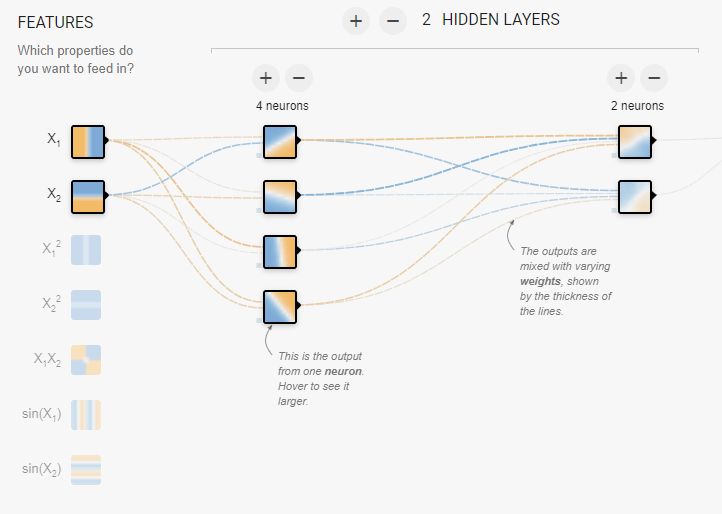

Source: https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.41400&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false